# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2024/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday October 1st, 2024 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via DTU Learn

# Part 1: Exploring the friendship paradox. 

This first part draws on the friendship paradox exercise from Week 3. You should provide solutions to the following exercises from **Part 3** of that week.

* *The friendship paradox in BA networks*
* *The friendship paradox more generally*
* *The friendship paradox and the configuration model*
* *Growth without preferential attachment*


In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def grow_Barabasi_Albert_graph(n = 5000):
    F_BA = nx.Graph()
    F_BA.add_edge(0, 1)

    def get_degree_list(G):
        degree_list = []
        for node in G.nodes:
            degree_list.extend([node] * G.degree[node])
        return degree_list

    def add_node_proportional_to_degree(G, new_node):
        degree_list = get_degree_list(G)
        target_node = random.choice(degree_list)
        G.add_edge(new_node, target_node)

    for new_node in range(2, n):
        add_node_proportional_to_degree(F_BA, new_node)

    return F_BA

random.seed(42)
F_BA = grow_Barabasi_Albert_graph(5000) #growing a Barabasi-Albert graph with 5000 nodes for the exrcises later

## a) The friendship paradox in BA networks
> * Pick a node $i$ at random (e.g. use `random.choice`). [Find its degree](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html).
> * Find $i$'s [neighbors](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.Graph.neighbors.html?highlight=neighbors#networkx.Graph.neighbors). And calculate their average degree.
> * Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than $i$.
> * Do this 1000 times. How many out of those 1000 times is the friendship paradox true in **F-BA**?

We will create a function since we will check for the friendship paradox of other graphs later. For the graph generated using the Barabasi-Albert method we can see that 875 out of 1000 friends have more friends on average (if we don't set the seed this count will oscilate, but be quite similar to our value). Since generating a network using the BA method will result in the formation of hubs, these results make sense.

In [3]:
def friendship_paradox(G, n = 1000):
    count = 0
    for _ in range(n):
        node = random.choice(list(G.nodes()))
        degree = G.degree[node]
        neighbors = G.neighbors(node)
        average_neighbours_degree = np.mean([G.degree[neighbor] for neighbor in neighbors])
        if average_neighbours_degree > degree:
            count += 1 #basically counting the number of times the condition is True
    print(f"Fraction of nodes whose friends have more friends on average: {count}/1000 = {count/10}%")

random.seed(42)
friendship_paradox(F_BA) #checking the friendship paradox on the Barabasi-Albert graph

Fraction of nodes whose friends have more friends on average: 875/1000 = 87.5%


## b) The friendship paradox more generally
> * What if the power law is flatter, e.g. $p(k) \sim k^{-\gamma}$ with $\gamma = 2$? Will the fraction of times the paradox is true be higher or lower? 
>  - First answer this question by simply reasoning. Think about what it would mean in terms of hubs that the power law is flatter?
>  - Now simulate a new network with the slope mentioned above. You can generate networks with power-law degree distributions using the [configuation model](https://en.wikipedia.org/wiki/Configuration_model). The `networkx` funtion is here [`nx.configuration_model`](https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html). I suggest you make the network pretty big ... let's say 5000 nodes or more.
>     * Hint 0: In the `networkx` function mentioned above, you need a degree sequence. This can be created using the so-called transformation method. If we can generate a random real number $r$ uniformly distributed in the range $0 \leq r < 1$, then $x = x_{\textrm{min}}(1 – r)^{-1/\alpha - 1}$ is a random power-law-distributed real number in the range $x_{\textrm{min}} \leq x < \infty$ with exponent $\alpha$. Note that there has to be a lower limit $x_\textrm{min}$ on the range; the power-law distribution diverges as $x\rightarrow 0$. See [this paper](https://www.cs.cornell.edu/courses/cs6241/2019sp/readings/Newman-2005-distributions.pdf) for more details.
>     * Hint 1: The sequence generated using the method mentioned above consists of real numbers, we need integers, so it needs to be rounded as well.
>     * Hint 2: Also, due to some details of how the configuation works (see the [wiki page](https://en.wikipedia.org/wiki/Configuration_model) for details), the sequence cannot have a sum which is an odd number, so if your sequence turns out odd, just choose an element and add 1 to its degree, that way the sum will be an even number.
> - Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?

Intuitively, we would expect a graph with a flatter power law to result in the formation of more large hubs. This will increase the likelihood of ovserving the friendship paradox even more since people are even more likely now to have such well-connected hubs as their friends. We will try to simulate such a network to prove this intuition.

In [4]:
def generate_powerlaw_degree_sequence(n, gamma, x_min):
    degrees = []
    for _ in range(n):
        r = random.random()
        degree = int(x_min * (1 - r) ** (-1 / (gamma - 1)))
        degrees.append(degree)
    
    #sum of degree needs to be even so:
    if sum(degrees) % 2 != 0:
        degrees[0] += 1 
    
    return degrees

def grow_configuration_model(n, gamma=2, x_min=1): # x-min being 1 makes sense since in a real friendship network each node should have at least one friend
    degree_sequence = generate_powerlaw_degree_sequence(n, gamma, x_min)

    F_config = nx.configuration_model(degree_sequence)

    #in the documentation of configuration model it is stated that it may have self loops and multiple edges, so we need to remove them
    F_config = nx.Graph(F_config)
    F_config.remove_edges_from(nx.selfloop_edges(F_config))
    return F_config

# Generate configuration model with gamma = 2
random.seed(42)
F_config = grow_configuration_model(5000, gamma=2, x_min=1)

# Check friendship paradox on configuration model graph
friendship_paradox(F_config)

Fraction of nodes whose friends have more friends on average: 974/1000 = 97.4%


Seems like our intuiton was correct since now the paradox holds for 974 out of 1000 people.

## c) The friendship paradox and the configuration model
> - Now generate a network for the configuration model that has *the same slope and number of nodes as **F-BA** in A above*; let's call this new network **F-CM** (for *friendship configuration model*). 
>    - What fraction of the time is the friendship paradox is true for the **F-CM** network?
>    - Assuming that **F-BA** and **F-CM** have the same degree sequence can now *think* about if **F-BA** and **F-CM** are different with respect to the friendship paradox. Specifically, please explain your thoughts on the following topics
>       * Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer).
>       * How would you test more rigorously if the friendship-paradox is actually true equally often in **F-BA** and **F-CM**? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)

To generate a network with the same slope we should now change the value of gamma to 3 which would correspond to a Barabasi-Albert method generated network.

In [5]:
random.seed(42)
F_CM = grow_configuration_model(5000, gamma=3, x_min=1)

# Check friendship paradox on configuration model graph
friendship_paradox(F_CM)

Fraction of nodes whose friends have more friends on average: 548/1000 = 54.8%


It seems like the configuration model results in the friendship paradox far less often (just from the counts so far, no statistical test has been conducted). For a sanity check we could see what a configuration model with the exact same degree sequence would show for our friendship paradox test.

In [6]:
#get the degree sequence from F_BA for our sanity check
degree_sequence_BA = [degree for node, degree in F_BA.degree()]

random.seed(42)
F_CM_same_degree = nx.configuration_model(degree_sequence_BA)
friendship_paradox(F_CM_same_degree)


Fraction of nodes whose friends have more friends on average: 640/1000 = 64.0%


We can notice that even with the exact same degree sequence, the configuration model results in the friendship paradox far less often. That could be because it lacks the growth property of the BA model. There should me more differences between the two networks as well, like assortativity, clustering, and community-structure.

If we wanted to make a more educated decision in saying that there is an actual statistical difference in the friendship paradox between F_BA and F_CM networks, we would need to compare the mean results of the two approaches. For that we could run the friendship_paradox function for 1000 times on the F_BA graph, and 1000 times on the F_CM graph. We can plot the two sets of results using a raincloud plot for visually comparing the two conditions. Assuming the two distributions are gaussian, we can perform a t-test to compare the two means.

## d)  Growth without preferential attachment

> Finally, we'll build a network of same size and degree as in the exercise above, *using the growth mechanism without the preferential attachment*. Follow the steps below for success
> 
>  1. Grow a new network (the Sune-network) with the same parameters as the **F-BA** network in the exercise above, i.e. 5000 nodes, each new node connects to the existing network, but with one key difference: *have the incoming nodes connect to the existing nodes with* **equal probability**. This is the Sune-network.
>  2. Generate an ER network of same number of nodes and links as the Sune-network. 
> * What are the differences between the ER network and the Sune-network? Explain in your own words. 
>   * *Hints*: To get started, plot the two degree distribution in the same plot. Compare and contrast. Another revealing network property to study is the the number of connected components.

We will grow the Sune-network by adding a node and connecting it to a random existing node in the graph (without preferential attachment)

In [7]:
def grow_Sune_network(n):
    G_sune = nx.Graph()
    G_sune.add_edge(0, 1)
    
    for new_node in range(2, n):
        #now we don't have preferential attachment so we can just select to create a connection to a random node, making things much simpler
        target_node = random.choice(list(G_sune.nodes()))
        G_sune.add_edge(new_node, target_node)
    
    return G_sune

def generate_ER_network(num_nodes, num_edges):
    p = num_edges / (num_nodes * (num_nodes - 1) / 2)  #probability of creating an edge necessary for the inbuilt function
    G_er = nx.erdos_renyi_graph(num_nodes, p)
    return G_er

def plot_degree_distributions(G1, G2, label1="Sune-network", label2="ER-network"):
    degrees_G1 = [G1.degree(n) for n in G1.nodes()]
    degrees_G2 = [G2.degree(n) for n in G2.nodes()]

    plt.figure(figsize=(10, 6))
    plt.hist(degrees_G1, bins=30, alpha=0.7, label=label1, density=True)
    plt.hist(degrees_G2, bins=30, alpha=0.7, label=label2, density=True)
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution Comparison')
    plt.legend()
    plt.show()

# generate the two networks
random.seed(42)
F_Sune = grow_Sune_network(5000)
num_edges_sune = F_Sune.number_of_edges() #get same number of edges
F_ER = generate_ER_network(5000, num_edges_sune)

In [8]:
# compare nr of connected components
sune_components = nx.number_connected_components(F_Sune)
er_components = nx.number_connected_components(F_ER)

print(f"Number of connected components in Sune-network: {sune_components}")
print(f"Number of connected components in ER network: {er_components}")

Number of connected components in Sune-network: 1
Number of connected components in ER network: 821


When we compare the number of connected components we can see that growing the network will always result in a single connected component. When we generate the graph all at once with the same number of nodes and edges (the ER network), we end up creating multiple separate connected components, since now we can no longer attach new nodes to the existing graph.

This will result in very different graphs with different degree distributions as we can observe in the figure bellow. The ER network will follow a Poisson distribution with many nodes not beign connected at all (having a degree of 0), while the Sune-network will follow an exponential distribution with the smallest degree of 1.

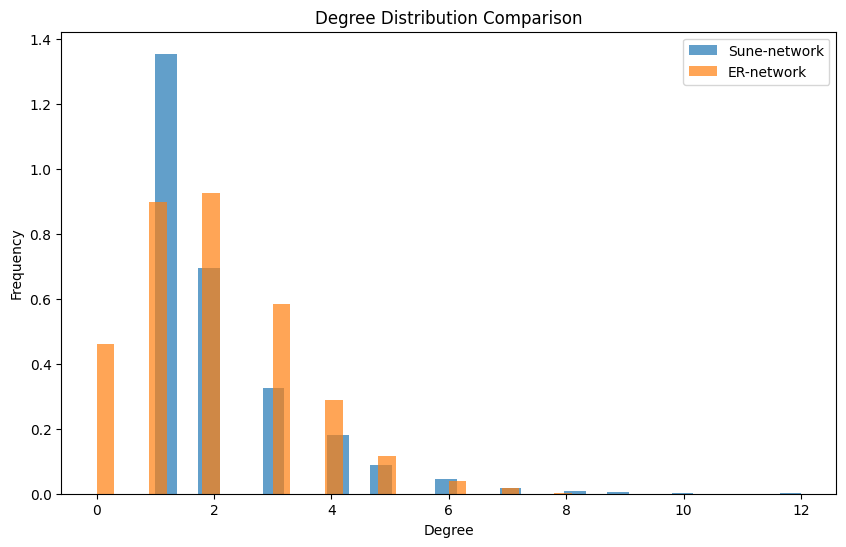

In [9]:
plot_degree_distributions(F_Sune, F_ER)

# Part 2: Stats of the Country Music Network

This second part requires you to have built the network of Country Musicians as described in the exercises for Week 4. You should complete the following exercise from **Part 2**.

* *Simple network statistics and analysis*

And the following exercise from **Part 3**

* *Let's build a simple visualization of the network*

And that's it! You're all set.